# HW05 Analysis
Solution is implemented in separated program.

---

Import modules

In [1]:
import subprocess
import matplotlib.pyplot as plt
import os
from time import time
from statistics import mean
import numpy as np

Helping fuctions

In [2]:
def timer(func):
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f'Function {func.__name__!r} executed in {(t2-t1):.4f}s')
        return result
    return wrap_func

Calculate instance via C++ program

In [3]:
@timer
def calculate(filepath: str, init_temperature: int=None, equilibrium: int=None, frozen_C: int=None, C: float=None, white_box=False):
    commands = ["python3", "simulated_annealing.py", filepath]
    if white_box:
        commands.append("-w")
    if init_temperature:
        commands += ["-t", str(init_temperature)]
    if equilibrium:
        commands += ["-e", str(equilibrium)]
    if frozen_C:
        commands += ["-f", str(frozen_C)]
    if C:
        commands += ["-c", str(C)]
    
    proc = subprocess.Popen(commands, stdout=subprocess.PIPE)
    output = proc.stdout.read().decode('UTF-8')
    return output

## White Box phase

Define functions

In [21]:
def print_weight_per_iteration(y, optimal_weight: int, y_description="cost"):
    x = range(len(y))

    plt.plot(x, y, label="states")
    if optimal_weight is not None:
        plt.plot(x, [optimal_weight] * len(y), label="optimal solution")
    plt.xlabel("# of iterations")
    plt.ylabel(y_description)
    # plt.title(f"Test robustnosti pro {method.name}")  # add title
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.show()

In [5]:
def load_optimal_result(filepath: str):
    f = open(filepath, "r")
    file_content = f.read()
    lines = file_content.split('\n')
    
    optimal_results = dict()
    for line in lines:
        instance_id = line.split(' ')[0]
        optimal_results[instance_id] = line
        
    return optimal_results     

Do white box phase

Function 'calculate' executed in 2.0940s
uf50-0123 10540 1 2 -3 4 5 -6 -7 8 9 10 11 -12 13 -14 15 -16 -17 -18 -19 -20 21 22 23 24 25 26 -27 28 29 30 31 32 -33 -34 -35 -36 37 38 39 40 -41 42 43 -44 45 46 47 -48 -49 50 0
uf50-0123.mwcnf 8163 1 2 3 -4 -5 6 7 8 -9 10 11 12 13 14 15 16 17 -18 -19 20 21 22 -23 24 -25 26 27 28 -29 30 31 32 -33 34 -35 -36 -37 38 -39 -40 -41 -42 -43 44 45 46 47 -48 49 50 0
8163 201 201 2.01 uf50-0123.mwcnf


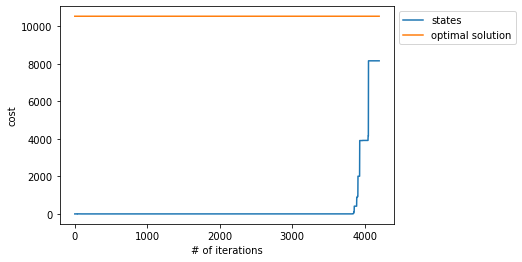

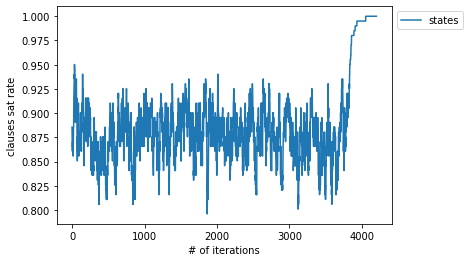

Function 'calculate' executed in 2.2113s
uf50-012 12019 1 2 3 4 5 -6 -7 -8 9 -10 11 12 13 -14 15 16 17 -18 19 20 21 22 23 24 -25 -26 -27 -28 29 30 31 32 33 34 35 -36 37 38 -39 40 -41 42 -43 -44 45 46 47 48 49 50 0
uf50-012.mwcnf 11685 1 2 3 -4 5 -6 -7 -8 9 -10 11 -12 13 -14 15 16 17 -18 19 20 -21 22 23 24 -25 26 -27 -28 29 30 31 32 33 34 35 -36 37 38 -39 40 -41 42 -43 -44 45 46 47 48 49 50 0
11685 201 201 2.15 uf50-012.mwcnf


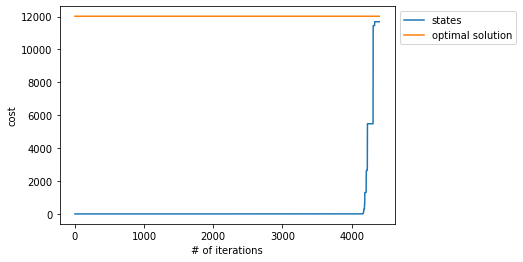

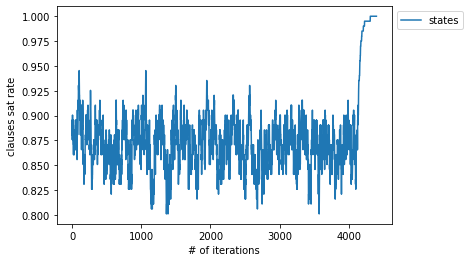

Function 'calculate' executed in 2.0054s
uf50-0133 11646 1 -2 -3 4 5 -6 7 8 9 -10 11 12 13 -14 15 16 17 18 19 -20 21 22 23 -24 -25 26 27 28 -29 -30 -31 32 -33 34 35 36 37 38 39 -40 -41 42 43 -44 45 46 -47 48 -49 50 0
uf50-0133.mwcnf 9774 1 -2 -3 4 5 -6 7 8 -9 -10 11 12 -13 14 -15 16 -17 18 19 20 21 22 23 24 -25 26 27 28 -29 30 -31 32 -33 34 -35 -36 37 38 39 -40 -41 42 43 -44 45 -46 -47 48 -49 50 0
9774 200 201 1.95 uf50-0133.mwcnf


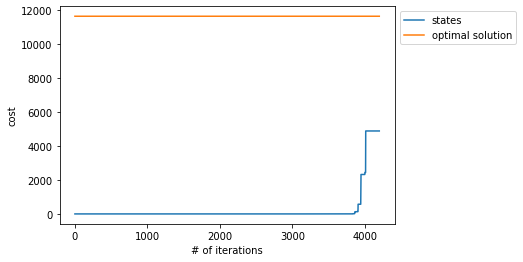

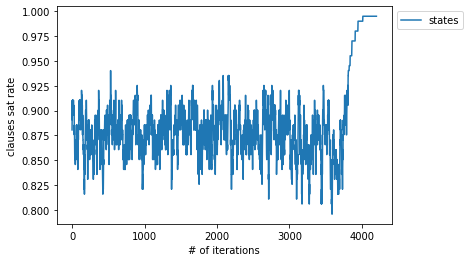

Function 'calculate' executed in 1.9080s
uf50-0139 13001 -1 -2 3 4 -5 6 7 8 9 10 -11 12 13 14 15 -16 -17 18 -19 20 -21 22 23 24 -25 26 27 28 -29 30 31 32 33 34 35 36 37 -38 39 -40 41 42 43 44 45 46 47 48 49 50 0
uf50-0139.mwcnf 8609 -1 -2 -3 4 -5 -6 -7 8 -9 10 -11 12 13 14 -15 -16 -17 18 -19 20 -21 22 -23 -24 -25 -26 27 -28 29 30 31 -32 33 34 -35 36 37 38 39 40 41 42 43 -44 -45 46 47 48 49 50 0
8609 199 201 1.85 uf50-0139.mwcnf


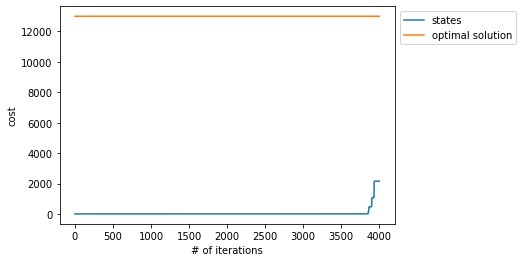

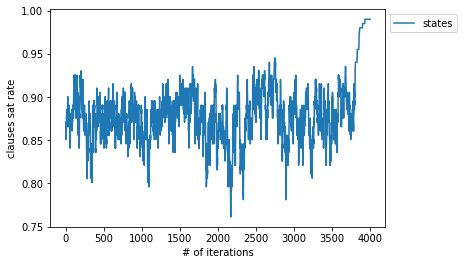

Function 'calculate' executed in 1.7828s
uf50-0241 11870 1 2 3 4 -5 -6 -7 8 -9 10 11 12 13 14 15 16 17 18 19 -20 -21 -22 -23 -24 25 26 27 28 29 30 -31 32 33 34 35 -36 37 38 39 -40 41 -42 43 44 -45 46 47 48 49 -50 0
uf50-0241.mwcnf 8731 1 2 3 4 -5 -6 7 8 -9 -10 11 -12 13 14 -15 -16 17 18 19 -20 21 22 -23 24 -25 26 27 -28 -29 -30 -31 32 33 34 -35 -36 37 -38 39 40 41 42 43 44 -45 46 -47 -48 49 -50 0
8731 200 201 1.71 uf50-0241.mwcnf


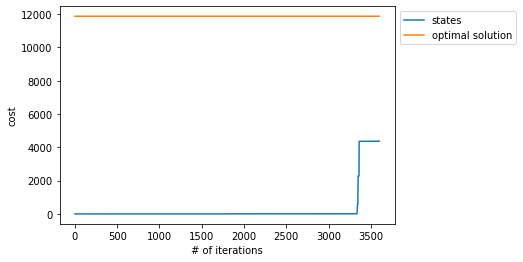

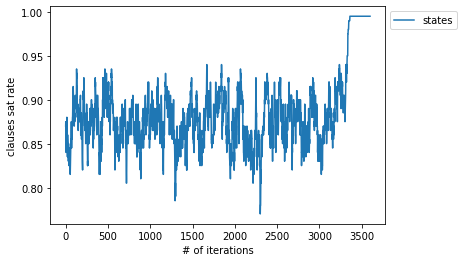

Function 'calculate' executed in 2.0181s
uf50-024 12212 1 2 3 4 5 -6 7 8 -9 -10 11 12 13 14 15 -16 17 18 19 20 21 -22 -23 24 25 26 27 28 29 30 31 32 -33 34 -35 36 37 38 -39 -40 -41 42 43 44 -45 46 47 -48 -49 50 0
uf50-024.mwcnf 11184 1 2 3 4 5 -6 7 8 9 10 11 12 13 -14 15 -16 17 -18 19 20 21 22 -23 24 25 26 27 28 29 30 -31 32 -33 34 -35 -36 37 38 39 40 41 42 43 -44 45 -46 47 -48 49 50 0
11184 199 201 1.95 uf50-024.mwcnf


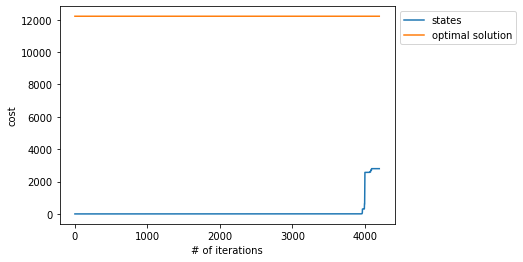

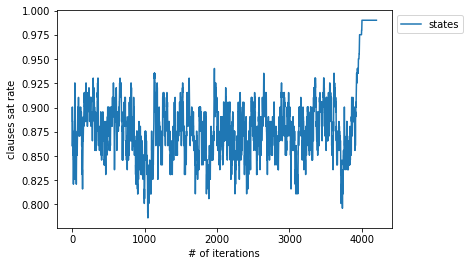

Function 'calculate' executed in 2.5289s
uf50-0274 12386 1 -2 3 -4 5 6 -7 8 -9 10 -11 12 -13 14 15 16 17 18 19 20 -21 -22 23 24 25 26 27 28 -29 30 -31 32 33 -34 35 36 37 -38 -39 40 41 42 43 44 45 46 -47 48 49 50 0
uf50-0274.mwcnf 9391 -1 2 3 -4 5 6 7 8 9 -10 -11 12 -13 14 -15 -16 17 18 19 -20 21 -22 23 -24 25 26 27 28 -29 -30 -31 32 -33 34 35 36 37 38 -39 40 41 -42 43 44 45 46 -47 48 49 -50 0
9391 198 201 2.47 uf50-0274.mwcnf


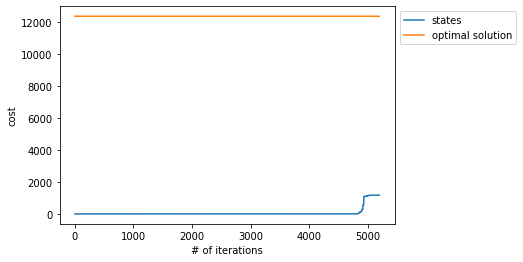

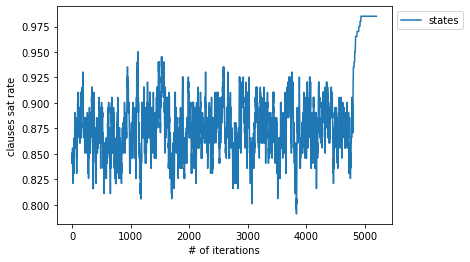

Function 'calculate' executed in 1.2482s
uf50-0369 21879 1 -2 3 4 -5 6 7 8 9 10 11 -12 -13 -14 -15 -16 17 18 -19 -20 21 -22 23 24 25 26 -27 -28 29 -30 31 32 33 -34 -35 -36 -37 -38 39 40 41 42 43 44 45 46 -47 48 -49 -50 0
uf50-0369.mwcnf 19508 1 -2 -3 -4 -5 6 7 8 9 10 11 -12 -13 -14 -15 -16 17 18 19 -20 21 -22 -23 24 -25 26 -27 -28 29 -30 31 -32 33 -34 -35 -36 -37 38 39 40 41 42 43 -44 45 46 -47 48 -49 50 0
19508 201 201 1.19 uf50-0369.mwcnf


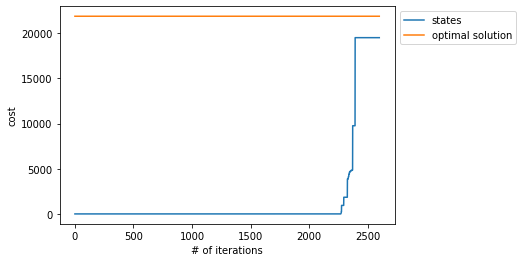

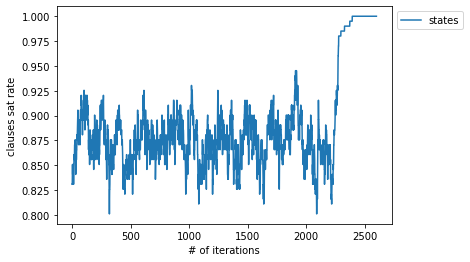

Function 'calculate' executed in 1.6354s
uf50-036 25968 1 2 3 -4 5 6 -7 8 -9 10 -11 12 13 14 15 16 -17 18 19 -20 21 22 23 24 -25 26 -27 -28 29 30 31 -32 -33 34 35 36 -37 38 39 40 -41 42 43 44 45 46 -47 48 -49 -50 0
uf50-036.mwcnf 22324 1 2 3 -4 5 -6 -7 -8 9 10 -11 12 13 14 -15 16 17 18 19 -20 21 22 23 24 25 26 -27 -28 -29 30 -31 -32 33 -34 35 36 37 38 -39 40 -41 -42 43 44 45 -46 -47 48 49 -50 0
22324 201 201 1.58 uf50-036.mwcnf


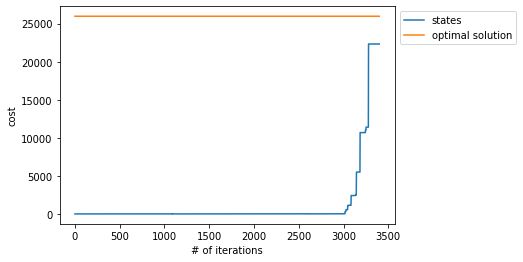

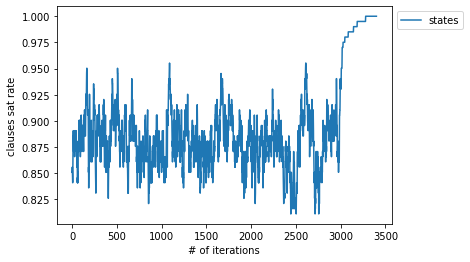

Function 'calculate' executed in 2.0024s
uf50-0405 26110 1 2 3 -4 5 -6 -7 -8 9 10 -11 12 13 14 15 16 -17 18 19 -20 21 22 23 24 -25 -26 27 28 -29 30 31 32 33 34 35 36 37 -38 39 -40 -41 42 -43 44 -45 46 47 48 49 -50 0
uf50-0405.mwcnf 23823 1 2 3 -4 5 -6 7 -8 9 10 -11 12 13 -14 15 16 -17 18 19 -20 21 -22 23 24 -25 -26 27 28 29 -30 31 32 -33 34 35 36 37 -38 -39 -40 -41 42 -43 44 -45 46 47 48 49 -50 0
23823 201 201 1.93 uf50-0405.mwcnf


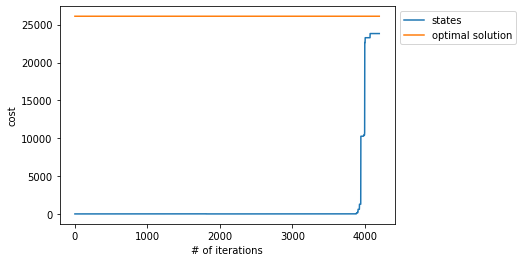

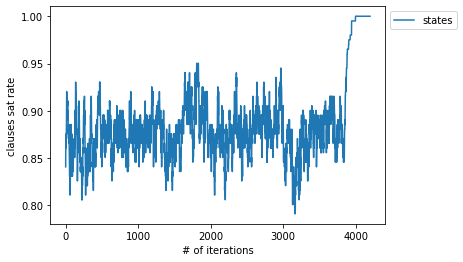

Function 'calculate' executed in 2.1893s
uf50-0414 31519 -1 2 3 -4 -5 -6 -7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 -24 25 26 27 -28 -29 30 31 32 33 34 35 -36 37 38 39 40 41 42 43 44 45 46 -47 48 49 50 0
uf50-0414.mwcnf 30640 1 2 3 4 -5 -6 -7 8 9 10 11 12 13 14 15 16 17 18 -19 20 -21 22 23 -24 25 26 27 -28 -29 30 31 32 33 34 35 -36 37 38 39 40 41 42 43 44 45 -46 -47 -48 49 50 0
30640 201 201 2.12 uf50-0414.mwcnf


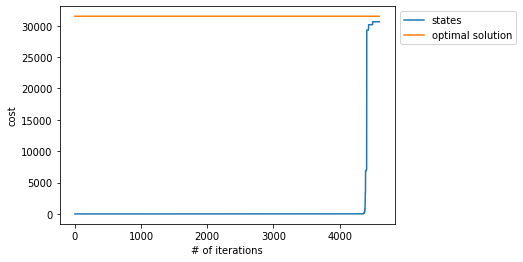

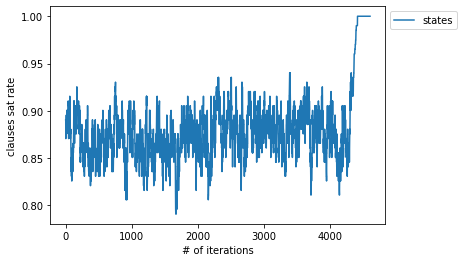

Function 'calculate' executed in 1.5511s
uf50-0430 22955 1 -2 -3 4 -5 6 -7 -8 9 10 -11 12 13 14 15 -16 17 18 -19 -20 21 22 23 24 25 26 27 28 29 -30 -31 32 -33 34 35 -36 -37 -38 -39 -40 -41 42 43 44 45 -46 47 48 49 -50 0
uf50-0430.mwcnf 20838 1 2 -3 4 -5 6 -7 -8 9 10 11 12 13 14 15 -16 17 18 -19 -20 21 -22 23 -24 25 26 27 28 29 30 -31 32 33 34 35 -36 37 -38 -39 -40 -41 42 43 44 -45 46 -47 48 49 -50 0
20838 199 201 1.49 uf50-0430.mwcnf


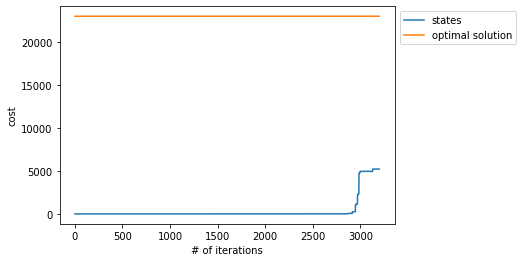

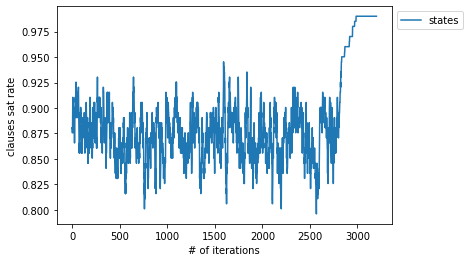

Function 'calculate' executed in 1.9917s
uf50-0434 17304 -1 -2 3 -4 5 6 7 -8 9 -10 11 -12 13 14 15 16 -17 -18 -19 20 21 -22 23 -24 25 -26 -27 -28 29 30 31 32 -33 34 -35 -36 -37 -38 39 40 -41 -42 43 44 45 46 -47 -48 49 -50 0
uf50-0434.mwcnf 13140 -1 2 3 4 5 -6 7 8 9 -10 11 12 -13 14 15 16 -17 -18 19 -20 21 -22 23 24 25 26 -27 -28 29 30 -31 -32 -33 34 -35 -36 -37 -38 39 -40 41 -42 43 44 45 46 -47 -48 49 -50 0
13140 201 201 1.93 uf50-0434.mwcnf


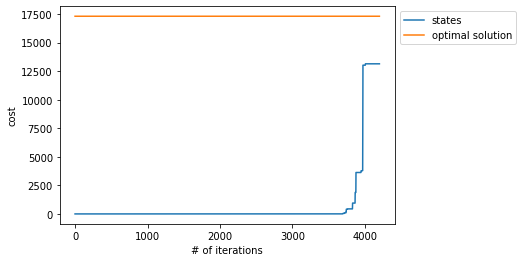

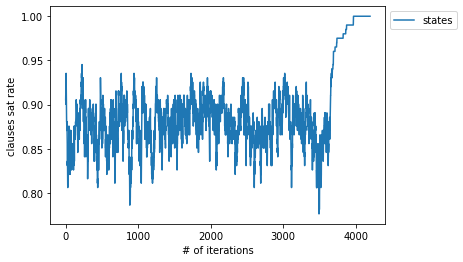

Function 'calculate' executed in 2.1814s
uf50-0441 22625 1 -2 -3 4 -5 -6 7 8 -9 -10 11 -12 13 14 15 -16 17 18 19 20 21 22 23 24 25 26 -27 28 29 -30 31 -32 -33 -34 35 -36 37 38 39 -40 41 -42 43 44 45 46 47 -48 -49 50 0
uf50-0441.mwcnf 19678 1 2 -3 -4 5 6 7 8 9 10 11 12 -13 -14 -15 16 17 18 19 20 21 22 23 -24 25 26 -27 -28 29 -30 31 32 -33 34 35 -36 37 38 39 40 41 42 43 44 45 46 47 -48 49 50 0
19678 197 201 2.12 uf50-0441.mwcnf


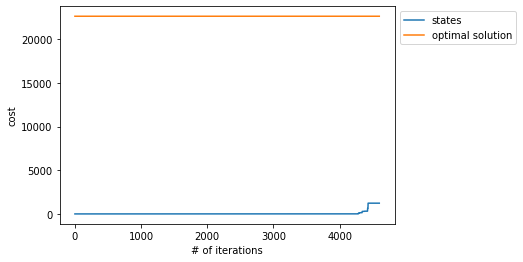

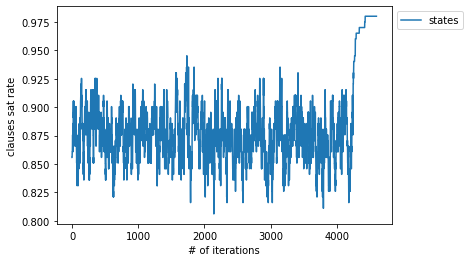

Function 'calculate' executed in 1.8088s
uf50-0452 25381 -1 2 3 4 -5 6 7 8 9 10 -11 12 -13 14 15 16 17 -18 19 20 21 -22 23 -24 25 26 27 28 29 30 -31 32 33 34 -35 36 -37 -38 -39 -40 41 42 43 -44 45 -46 47 48 -49 50 0
uf50-0452.mwcnf 24659 -1 2 3 4 -5 6 7 8 9 10 11 12 -13 14 15 16 17 -18 19 20 21 -22 23 -24 25 -26 27 28 29 30 -31 32 33 34 -35 36 -37 -38 -39 -40 41 42 43 -44 45 -46 47 48 -49 50 0
24659 201 201 1.75 uf50-0452.mwcnf


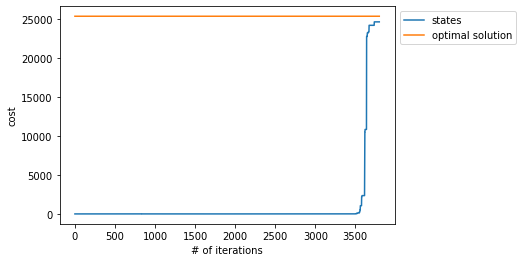

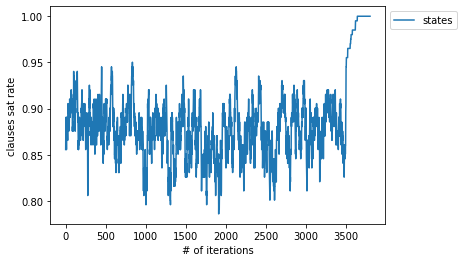

Function 'calculate' executed in 1.5225s
uf50-0470 23713 -1 2 -3 -4 5 -6 -7 8 9 10 11 12 -13 -14 -15 -16 17 18 19 -20 21 22 -23 -24 25 -26 27 -28 29 30 -31 32 -33 34 -35 36 -37 38 39 40 41 -42 43 44 45 46 47 48 49 50 0
uf50-0470.mwcnf 17959 -1 -2 -3 -4 5 -6 -7 -8 9 10 11 -12 -13 -14 -15 -16 17 18 19 -20 21 22 -23 -24 25 -26 27 -28 -29 30 -31 -32 33 34 35 -36 37 38 39 40 41 -42 43 -44 45 46 -47 48 49 50 0
17959 197 201 1.47 uf50-0470.mwcnf


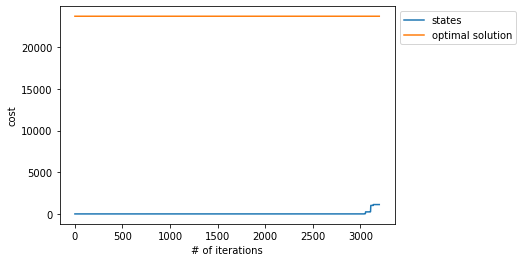

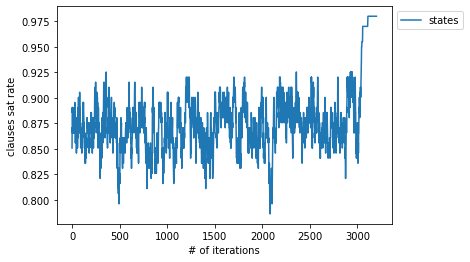

Function 'calculate' executed in 1.8851s
uf50-0485 23206 1 -2 -3 4 5 -6 -7 8 -9 -10 11 12 13 14 -15 -16 17 18 19 20 -21 22 23 24 25 -26 -27 28 29 30 31 32 33 -34 35 36 -37 38 39 40 41 42 -43 44 45 -46 47 -48 -49 -50 0
uf50-0485.mwcnf 18271 1 -2 -3 4 5 6 -7 8 -9 -10 -11 12 13 14 15 16 17 18 19 -20 -21 22 -23 24 -25 -26 -27 28 29 30 31 32 -33 -34 -35 -36 37 38 39 40 41 42 -43 44 -45 46 -47 48 -49 -50 0
18271 197 201 1.82 uf50-0485.mwcnf


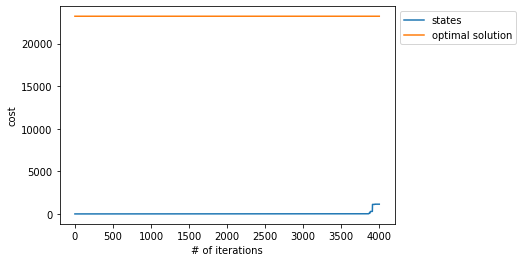

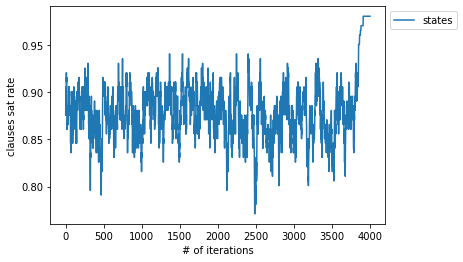

Function 'calculate' executed in 2.2707s
uf50-0613 34892 -1 -2 3 4 -5 6 -7 8 9 10 11 12 -13 14 15 -16 17 18 19 20 21 22 -23 -24 25 26 27 28 29 30 31 -32 -33 34 35 -36 37 -38 39 -40 -41 -42 43 44 45 46 47 48 49 50 0
uf50-0613.mwcnf 24827 1 2 3 4 5 -6 -7 8 -9 10 11 12 13 14 -15 -16 17 18 -19 20 21 22 23 -24 25 26 27 28 -29 -30 31 32 -33 34 35 -36 -37 38 39 -40 41 -42 43 44 -45 -46 -47 48 -49 -50 0
24827 199 201 2.21 uf50-0613.mwcnf


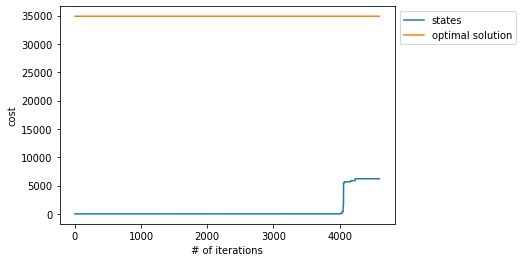

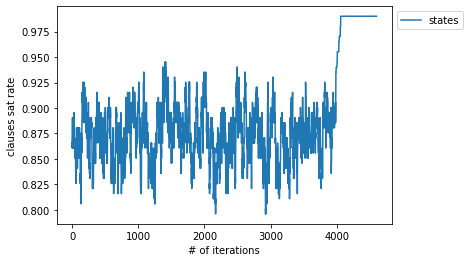

Function 'calculate' executed in 2.3359s
uf50-0620 35091 1 2 3 4 5 6 -7 8 -9 -10 11 12 -13 14 -15 -16 -17 18 -19 20 21 -22 23 24 25 26 27 -28 29 30 31 -32 33 34 35 36 37 38 -39 40 41 42 -43 44 -45 46 47 48 -49 -50 0
uf50-0620.mwcnf 35058 1 2 3 4 5 6 -7 8 -9 -10 11 12 -13 14 15 -16 -17 18 -19 20 21 -22 23 24 25 26 27 -28 29 30 31 -32 33 34 35 36 37 38 -39 40 -41 42 -43 44 -45 46 47 48 -49 -50 0
35058 201 201 2.26 uf50-0620.mwcnf


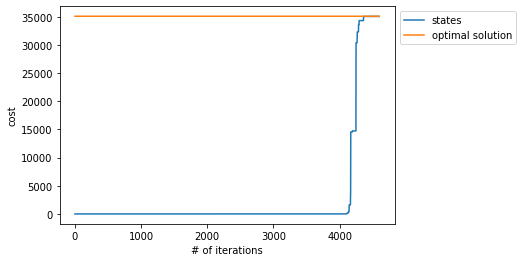

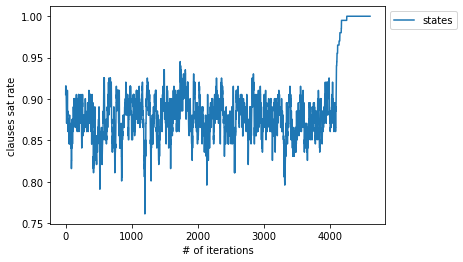

Function 'calculate' executed in 2.2828s
uf50-0642 34166 -1 2 3 4 5 6 -7 -8 9 -10 11 12 13 14 15 -16 17 18 19 20 21 22 -23 24 -25 -26 27 28 29 30 31 -32 33 34 35 36 37 -38 39 40 -41 42 -43 -44 45 -46 47 -48 49 -50 0
uf50-0642.mwcnf 34086 -1 2 3 4 5 6 -7 -8 9 -10 11 -12 13 14 15 -16 17 18 19 20 21 22 -23 24 -25 -26 27 28 29 30 31 32 33 34 35 36 37 -38 39 40 -41 42 -43 -44 45 -46 47 -48 49 -50 0
34086 201 201 2.20 uf50-0642.mwcnf


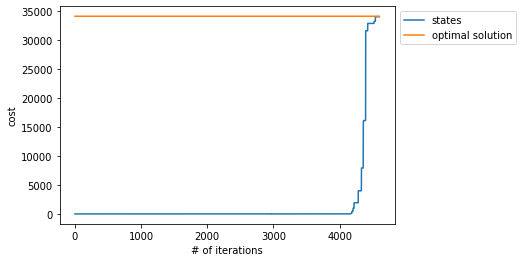

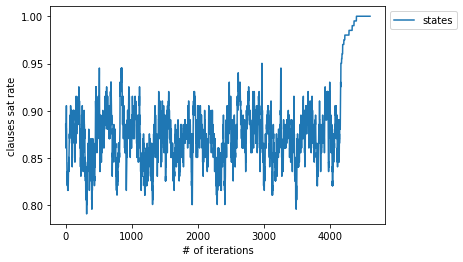




Avg. sat rate: 0.9937810945273633
Avg. weight rate: 0.8527450701554663
Avg. exec time: 1.9080000000000001


In [82]:
# ids = ["2", "200", "206", "199", "113", "114", "98", "149", "152", "128",
#        "18", "198", "101", "17", "55", "197", "12", "43", "66", "185"]
ids = ["123", "12", "133", "139", "241", "24", "274", "369", "36", "405",
      "414", "430", "434", "441", "452", "470", "485", "613", "620", "642"]
set_name = "wuf-M1"
size_inst_name = "wuf50-201-M1"
size = size_inst_name[3:5]
init_temperature = None
frozen = None
equilibrium = 200
C = 0.7

sat_rate = []
weight_rate = []
exec_time = []
for id_ in ids:
    instance_id = "uf" + size + "-0" + id_
    output = calculate(f"sets/{set_name}/{size_inst_name}/w" + instance_id + ".mwcnf", 
                       init_temperature,
                       equilibrium,
                       frozen,
                       C,
                       white_box=True)
    [result, brief, iterations, clauses_sat, _] = output.split("\n")
    y = iterations.split(' ')
    y = list(map(lambda x: float(x), y))
    y2 = clauses_sat.split(' ')
    y2 = list(map(lambda x: float(x), y2))

    optimal = int(load_optimal_result(f"sets/{set_name}/{size_inst_name}-opt.dat")[instance_id].split(' ')[1])
    print(load_optimal_result(f"sets/{set_name}/{size_inst_name}-opt.dat")[instance_id])
    print(result)
    print(brief)
    print_weight_per_iteration(y, optimal, y_description="cost")
    print_weight_per_iteration(y2, None, y_description="clauses sat rate")
    
    sat_rate.append(int(brief.split(' ')[1]) / int(brief.split(' ')[2]))
    weight_rate.append(int(brief.split(' ')[0]) / optimal)
    exec_time.append(float(brief.split(' ')[3]))
    
# ============ SUMMARY ============

print("\n\n====================================\n")
print("Avg. sat rate:", np.mean(sat_rate))
print("Avg. weight rate:", np.mean(weight_rate))
print("Avg. exec time:", np.mean(exec_time))

Check result consistency of random instance

In [89]:
sat_rate = []
weight_rate = []
exec_time = []
for i in range(20):
    output = calculate("sets/wuf-M1/wuf50-201-M1/wuf50-0123.mwcnf", 
                       None,
                       None,
                       None,
                       0.7,
                       white_box=True)
    optimal = int(load_optimal_result("sets/wuf-M1/wuf50-201-M1-opt.dat")["uf50-0123"].split(' ')[1])
    [result, brief, iterations, clauses_sat, _] = output.split("\n")
    sat_rate.append(int(brief.split(' ')[1]) / int(brief.split(' ')[2]))
    weight_rate.append(int(brief.split(' ')[0]) / optimal)
    exec_time.append(float(brief.split(' ')[3]))

print("\n\n====================================\n")
print("Avg. sat rate:", np.mean(sat_rate))
print("Avg. weight rate:", np.mean(weight_rate))
print("Avg. exec time:", np.mean(exec_time))
print("Var sat rate:", np.var(sat_rate))
print("Var weight rate:", np.var(weight_rate))
print("Var exec time:", np.var(exec_time))
print("Max sat rate:", max(sat_rate))
print("Max weight rate:", max(weight_rate))
print("Max exec time:", max(exec_time))
print("Min sat rate:", min(sat_rate))
print("Min weight rate:", min(weight_rate))
print("Min exec time:", min(exec_time))

Function 'calculate' executed in 2.6049s
Function 'calculate' executed in 2.6611s
Function 'calculate' executed in 2.1215s
Function 'calculate' executed in 2.3576s
Function 'calculate' executed in 2.3557s
Function 'calculate' executed in 2.1161s
Function 'calculate' executed in 2.3462s
Function 'calculate' executed in 1.8945s
Function 'calculate' executed in 2.5945s
Function 'calculate' executed in 2.3454s
Function 'calculate' executed in 2.3621s
Function 'calculate' executed in 2.8290s
Function 'calculate' executed in 1.9099s
Function 'calculate' executed in 2.1072s
Function 'calculate' executed in 2.3658s
Function 'calculate' executed in 3.5020s
Function 'calculate' executed in 1.9217s
Function 'calculate' executed in 1.8917s
Function 'calculate' executed in 2.1372s
Function 'calculate' executed in 2.5992s



Avg. sat rate: 0.9972636815920397
Avg. weight rate: 0.9176091081593928
Avg. exec time: 2.288
Var sat rate: 1.3551644761268164e-05
Var weight rate: 0.0037655136842029467
Var exec

## Black box phase

Calculate sets

In [34]:
def make_directory(directory: str):
    dir_layers = directory.split("/")
    for l_idx in range(len(dir_layers)):
        subdirectory = "/".join(dir_layers[0:l_idx+1])
        subprocess.run(["mkdir", "-p", subdirectory])

In [35]:
def check_set(set_filepath: str,
              exp_name: str,
              init_temperature: int,
              equilibrium: int,
              frozen_C: int,
              C: float,
              description=""):
    for (root,dirs,files) in os.walk(set_filepath, topdown=True):
        print("Calculating", root, "...")
        if root == set_filepath:
            continue
        
        # calculate and save solutions and time
        results = []
        briefs = []
        for file in files:
            output = calculate(root + "/" + file, init_temperature, equilibrium, frozen_C, C)
            [result, brief, _] = output.split('\n')
            results.append(result)
            briefs.append(brief)
        
        # save results
        target_dir = "results/" + exp_name + "/" + set_filepath.split("/")[1]
        make_directory(target_dir)
        target_filename = root.split("/")[-1] + "-res.dat"
        f = open(target_dir + "/" + target_filename, "w")
        f.write("\n".join(results))
        f.close()
        
        target_filename = root.split("/")[-1] + "-brief.dat"
        f = open(target_dir + "/" + target_filename, "w")
        f.write("\n".join(briefs))
        f.close()

        
def calculate_all_sets(exp_name: str,
                      init_temperature: int,
                      equilibrium: int,
                      frozen_C: int,
                      C: float,
                      description=""):
    # create description file
    target_dir = "results/" + exp_name
    make_directory(target_dir)
    f = open(target_dir + "/" + "parameters.txt", "w")
    f.write(str(init_temperature) + " " +
            str(equilibrium) + " " +
            str(frozen_C) + " " +
            str(C) + "\n" +
            description)
    f.close()
    
    # calculate sets
    sets = ["wuf-A1", "wuf-M1", "wuf-N1", "wuf-Q1", "wuf-R1"]
    for s in sets:
        check_set(f"sets/{s}", exp_name, init_temperature, equilibrium, frozen_C, C, description)

In [83]:
calculate_all_sets("ex4", None, None, None, 0.7)

Calculating sets/wuf-A1 ...
Calculating sets/wuf-A1/wuf20-88-A1 ...
Function 'calculate' executed in 0.2005s
Function 'calculate' executed in 0.3114s
Function 'calculate' executed in 0.2131s
Function 'calculate' executed in 0.1743s
Function 'calculate' executed in 0.3304s
Function 'calculate' executed in 0.2406s
Function 'calculate' executed in 0.2740s
Function 'calculate' executed in 0.4729s
Function 'calculate' executed in 0.2363s
Function 'calculate' executed in 0.2686s
Function 'calculate' executed in 0.3112s
Function 'calculate' executed in 0.3139s
Function 'calculate' executed in 0.2646s
Function 'calculate' executed in 0.4157s
Function 'calculate' executed in 0.4230s
Function 'calculate' executed in 0.2364s
Function 'calculate' executed in 0.5818s
Function 'calculate' executed in 0.1514s
Function 'calculate' executed in 0.2647s
Function 'calculate' executed in 0.1150s
Function 'calculate' executed in 0.2864s
Function 'calculate' executed in 0.3866s
Function 'calculate' executed 

Function 'calculate' executed in 0.2320s
Function 'calculate' executed in 0.3113s
Function 'calculate' executed in 0.1879s
Function 'calculate' executed in 0.2726s
Function 'calculate' executed in 0.2349s
Function 'calculate' executed in 0.4157s
Function 'calculate' executed in 0.2710s
Function 'calculate' executed in 0.3151s
Function 'calculate' executed in 0.3384s
Function 'calculate' executed in 0.3077s
Function 'calculate' executed in 0.1928s
Function 'calculate' executed in 0.2716s
Function 'calculate' executed in 0.2983s
Function 'calculate' executed in 0.1559s
Function 'calculate' executed in 0.7647s
Function 'calculate' executed in 0.2173s
Calculating sets/wuf-A1/wuf20-91-A1 ...
Function 'calculate' executed in 0.2399s
Function 'calculate' executed in 0.2432s
Function 'calculate' executed in 0.5545s
Function 'calculate' executed in 0.2954s
Function 'calculate' executed in 0.2794s
Function 'calculate' executed in 0.2726s
Function 'calculate' executed in 0.3124s
Function 'calcula

Function 'calculate' executed in 0.2771s
Function 'calculate' executed in 0.1633s
Function 'calculate' executed in 0.3101s
Function 'calculate' executed in 0.3098s
Function 'calculate' executed in 0.2795s
Function 'calculate' executed in 0.2742s
Function 'calculate' executed in 0.2846s
Function 'calculate' executed in 0.1907s
Function 'calculate' executed in 0.2013s
Function 'calculate' executed in 0.1609s
Function 'calculate' executed in 0.2368s
Function 'calculate' executed in 0.4292s
Function 'calculate' executed in 0.1900s
Function 'calculate' executed in 0.2840s
Function 'calculate' executed in 0.4251s
Function 'calculate' executed in 0.7097s
Function 'calculate' executed in 0.3318s
Function 'calculate' executed in 0.5412s
Function 'calculate' executed in 0.2667s
Function 'calculate' executed in 0.8347s
Function 'calculate' executed in 0.5907s
Function 'calculate' executed in 0.2413s
Function 'calculate' executed in 0.5123s
Function 'calculate' executed in 0.3227s
Function 'calcul

Function 'calculate' executed in 0.3757s
Function 'calculate' executed in 0.1898s
Function 'calculate' executed in 0.3549s
Calculating sets/wuf-A1/wuf100-430-A1 ...
Function 'calculate' executed in 47.3942s
Function 'calculate' executed in 45.4334s
Function 'calculate' executed in 46.8695s
Function 'calculate' executed in 48.4649s
Function 'calculate' executed in 43.5272s
Function 'calculate' executed in 45.2685s
Function 'calculate' executed in 47.3958s
Function 'calculate' executed in 43.0737s
Function 'calculate' executed in 47.4178s
Function 'calculate' executed in 42.9116s
Function 'calculate' executed in 52.6669s
Function 'calculate' executed in 49.8409s
Function 'calculate' executed in 37.2049s
Function 'calculate' executed in 46.0158s
Function 'calculate' executed in 47.1930s
Function 'calculate' executed in 47.2319s
Function 'calculate' executed in 42.0756s
Function 'calculate' executed in 45.7292s
Function 'calculate' executed in 42.2080s
Function 'calculate' executed in 45.6

Function 'calculate' executed in 17.1377s
Function 'calculate' executed in 13.1989s
Function 'calculate' executed in 15.4173s
Function 'calculate' executed in 12.6503s
Function 'calculate' executed in 14.9324s
Function 'calculate' executed in 13.6396s
Function 'calculate' executed in 16.7893s
Function 'calculate' executed in 15.0823s
Function 'calculate' executed in 16.0364s
Function 'calculate' executed in 14.8613s
Function 'calculate' executed in 13.9089s
Function 'calculate' executed in 14.9968s
Function 'calculate' executed in 19.4126s
Function 'calculate' executed in 10.9172s
Function 'calculate' executed in 13.1709s
Function 'calculate' executed in 15.8400s
Function 'calculate' executed in 13.4005s
Function 'calculate' executed in 14.0942s
Function 'calculate' executed in 18.3647s
Function 'calculate' executed in 14.5525s
Function 'calculate' executed in 16.2273s
Function 'calculate' executed in 11.3746s
Function 'calculate' executed in 17.1224s
Function 'calculate' executed in 1

Function 'calculate' executed in 3.8677s
Function 'calculate' executed in 1.8978s
Function 'calculate' executed in 3.6317s
Function 'calculate' executed in 2.4692s
Function 'calculate' executed in 3.2056s
Function 'calculate' executed in 3.8088s
Function 'calculate' executed in 3.1790s
Function 'calculate' executed in 5.2982s
Function 'calculate' executed in 4.5191s
Function 'calculate' executed in 3.2668s
Function 'calculate' executed in 3.0241s
Function 'calculate' executed in 1.8731s
Function 'calculate' executed in 3.6710s
Function 'calculate' executed in 3.8468s
Function 'calculate' executed in 3.3110s
Function 'calculate' executed in 2.8745s
Function 'calculate' executed in 3.2804s
Function 'calculate' executed in 2.8678s
Function 'calculate' executed in 2.4591s
Function 'calculate' executed in 3.2559s
Function 'calculate' executed in 3.8554s
Function 'calculate' executed in 1.8385s
Function 'calculate' executed in 5.0542s
Function 'calculate' executed in 1.3110s
Function 'calcul

Function 'calculate' executed in 4.6021s
Function 'calculate' executed in 3.2517s
Function 'calculate' executed in 2.6372s
Function 'calculate' executed in 2.2880s
Function 'calculate' executed in 1.8784s
Function 'calculate' executed in 2.4823s
Function 'calculate' executed in 4.6377s
Function 'calculate' executed in 3.6360s
Function 'calculate' executed in 4.2997s
Function 'calculate' executed in 3.7167s
Function 'calculate' executed in 3.6596s
Function 'calculate' executed in 3.6598s
Function 'calculate' executed in 2.6373s
Function 'calculate' executed in 3.3033s
Function 'calculate' executed in 3.6614s
Function 'calculate' executed in 3.9180s
Function 'calculate' executed in 3.2652s
Function 'calculate' executed in 3.8427s
Function 'calculate' executed in 4.3179s
Function 'calculate' executed in 3.5975s
Function 'calculate' executed in 2.4855s
Function 'calculate' executed in 3.2399s
Function 'calculate' executed in 3.2888s
Function 'calculate' executed in 2.8738s
Function 'calcul

Function 'calculate' executed in 2.8377s
Function 'calculate' executed in 3.0272s
Function 'calculate' executed in 3.2148s
Function 'calculate' executed in 3.0644s
Function 'calculate' executed in 3.8651s
Function 'calculate' executed in 2.6619s
Function 'calculate' executed in 3.4355s
Function 'calculate' executed in 1.6457s
Function 'calculate' executed in 2.0487s
Function 'calculate' executed in 3.6423s
Function 'calculate' executed in 4.0463s
Function 'calculate' executed in 2.6660s
Function 'calculate' executed in 4.8211s
Function 'calculate' executed in 2.2225s
Function 'calculate' executed in 3.4533s
Function 'calculate' executed in 3.4552s
Function 'calculate' executed in 1.8462s
Function 'calculate' executed in 2.6219s
Function 'calculate' executed in 1.8441s
Function 'calculate' executed in 3.0484s
Function 'calculate' executed in 3.0063s
Function 'calculate' executed in 3.6537s
Function 'calculate' executed in 1.6248s
Function 'calculate' executed in 4.0813s
Function 'calcul

Function 'calculate' executed in 2.8619s
Function 'calculate' executed in 3.2378s
Function 'calculate' executed in 4.5845s
Function 'calculate' executed in 3.4512s
Function 'calculate' executed in 3.0723s
Function 'calculate' executed in 1.8709s
Function 'calculate' executed in 2.0173s
Function 'calculate' executed in 3.6584s
Function 'calculate' executed in 3.8588s
Function 'calculate' executed in 2.6766s
Function 'calculate' executed in 3.8744s
Function 'calculate' executed in 2.0402s
Function 'calculate' executed in 2.2324s
Function 'calculate' executed in 3.2270s
Function 'calculate' executed in 3.6196s
Function 'calculate' executed in 3.2763s
Function 'calculate' executed in 3.6766s
Function 'calculate' executed in 3.2460s
Function 'calculate' executed in 3.6532s
Function 'calculate' executed in 2.8456s
Function 'calculate' executed in 2.4532s
Function 'calculate' executed in 4.8193s
Function 'calculate' executed in 3.8669s
Function 'calculate' executed in 4.8175s
Function 'calcul

Function 'calculate' executed in 3.2472s
Function 'calculate' executed in 3.6734s
Function 'calculate' executed in 4.6330s
Function 'calculate' executed in 2.2603s
Function 'calculate' executed in 3.0875s
Function 'calculate' executed in 3.6823s
Function 'calculate' executed in 1.4940s
Function 'calculate' executed in 2.8306s
Function 'calculate' executed in 2.0852s
Function 'calculate' executed in 2.0557s
Function 'calculate' executed in 3.4703s
Function 'calculate' executed in 2.8800s
Function 'calculate' executed in 2.8733s
Function 'calculate' executed in 2.8214s
Function 'calculate' executed in 3.4820s
Function 'calculate' executed in 1.8843s
Function 'calculate' executed in 2.4585s
Function 'calculate' executed in 2.4801s
Function 'calculate' executed in 3.2636s
Function 'calculate' executed in 2.2656s
Function 'calculate' executed in 2.4730s
Function 'calculate' executed in 2.8755s
Function 'calculate' executed in 2.2609s
Function 'calculate' executed in 4.8989s
Function 'calcul

Function 'calculate' executed in 0.3016s
Function 'calculate' executed in 0.1787s
Function 'calculate' executed in 0.1766s
Function 'calculate' executed in 0.1772s
Function 'calculate' executed in 0.1781s
Function 'calculate' executed in 0.2438s
Function 'calculate' executed in 0.1798s
Function 'calculate' executed in 0.1782s
Function 'calculate' executed in 0.2442s
Function 'calculate' executed in 0.2180s
Function 'calculate' executed in 0.2159s
Function 'calculate' executed in 0.2493s
Function 'calculate' executed in 0.2537s
Function 'calculate' executed in 0.4819s
Function 'calculate' executed in 0.1557s
Function 'calculate' executed in 0.2117s
Function 'calculate' executed in 0.1861s
Function 'calculate' executed in 0.2281s
Function 'calculate' executed in 0.2866s
Function 'calculate' executed in 0.3072s
Function 'calculate' executed in 0.2739s
Function 'calculate' executed in 0.3768s
Function 'calculate' executed in 0.5239s
Function 'calculate' executed in 0.3365s
Function 'calcul

Function 'calculate' executed in 0.3221s
Function 'calculate' executed in 0.4619s
Function 'calculate' executed in 0.2600s
Function 'calculate' executed in 0.1879s
Function 'calculate' executed in 0.2224s
Function 'calculate' executed in 0.1798s
Function 'calculate' executed in 0.1763s
Function 'calculate' executed in 0.2948s
Function 'calculate' executed in 0.2152s
Function 'calculate' executed in 0.2109s
Function 'calculate' executed in 0.3478s
Function 'calculate' executed in 0.2844s
Function 'calculate' executed in 0.1538s
Function 'calculate' executed in 0.1903s
Function 'calculate' executed in 0.2501s
Function 'calculate' executed in 0.2197s
Function 'calculate' executed in 0.2889s
Function 'calculate' executed in 0.1906s
Function 'calculate' executed in 0.2556s
Function 'calculate' executed in 0.2470s
Function 'calculate' executed in 0.2075s
Function 'calculate' executed in 0.1460s
Function 'calculate' executed in 0.3163s
Function 'calculate' executed in 0.3885s
Function 'calcul

Function 'calculate' executed in 0.2436s
Function 'calculate' executed in 0.1719s
Function 'calculate' executed in 0.1781s
Function 'calculate' executed in 0.2078s
Function 'calculate' executed in 0.2059s
Function 'calculate' executed in 0.2064s
Function 'calculate' executed in 0.2081s
Function 'calculate' executed in 0.1800s
Function 'calculate' executed in 0.1738s
Function 'calculate' executed in 0.1373s
Function 'calculate' executed in 0.5059s
Function 'calculate' executed in 0.1585s
Function 'calculate' executed in 0.1527s
Function 'calculate' executed in 0.2221s
Function 'calculate' executed in 0.2183s
Function 'calculate' executed in 0.3243s
Function 'calculate' executed in 0.2288s
Function 'calculate' executed in 0.2246s
Function 'calculate' executed in 0.4547s
Function 'calculate' executed in 0.2099s
Function 'calculate' executed in 0.2759s
Function 'calculate' executed in 0.3091s
Function 'calculate' executed in 0.2161s
Function 'calculate' executed in 0.2864s
Function 'calcul

Function 'calculate' executed in 0.2663s
Function 'calculate' executed in 0.2439s
Function 'calculate' executed in 0.2099s
Function 'calculate' executed in 0.2507s
Function 'calculate' executed in 0.2858s
Function 'calculate' executed in 0.2464s
Function 'calculate' executed in 0.3138s
Function 'calculate' executed in 0.1849s
Function 'calculate' executed in 0.1800s
Function 'calculate' executed in 0.2107s
Function 'calculate' executed in 0.1848s
Function 'calculate' executed in 0.1899s
Function 'calculate' executed in 0.2179s
Function 'calculate' executed in 0.1742s
Function 'calculate' executed in 0.1763s
Function 'calculate' executed in 0.1818s
Function 'calculate' executed in 0.4869s
Function 'calculate' executed in 0.2260s
Function 'calculate' executed in 0.6489s
Function 'calculate' executed in 0.2557s
Function 'calculate' executed in 0.4782s
Function 'calculate' executed in 0.3192s
Function 'calculate' executed in 0.2820s
Function 'calculate' executed in 0.3158s
Function 'calcul

Function 'calculate' executed in 0.2189s
Function 'calculate' executed in 0.2442s
Function 'calculate' executed in 0.1858s
Function 'calculate' executed in 0.2551s
Function 'calculate' executed in 0.1147s
Function 'calculate' executed in 0.2734s
Function 'calculate' executed in 0.2242s
Function 'calculate' executed in 0.1792s
Function 'calculate' executed in 0.2122s
Function 'calculate' executed in 0.2778s
Function 'calculate' executed in 0.2773s
Function 'calculate' executed in 0.1448s
Function 'calculate' executed in 0.1793s
Function 'calculate' executed in 0.1775s
Function 'calculate' executed in 0.2437s
Function 'calculate' executed in 0.1744s
Function 'calculate' executed in 0.2429s
Function 'calculate' executed in 0.2095s
Function 'calculate' executed in 0.2180s
Function 'calculate' executed in 0.2166s
Function 'calculate' executed in 0.1760s
Function 'calculate' executed in 0.3145s
Function 'calculate' executed in 0.2790s
Function 'calculate' executed in 0.3158s
Function 'calcul

Function 'calculate' executed in 0.3473s
Function 'calculate' executed in 0.2114s
Function 'calculate' executed in 0.2211s
Function 'calculate' executed in 0.1790s
Function 'calculate' executed in 0.1859s
Function 'calculate' executed in 0.3210s
Function 'calculate' executed in 0.4905s
Function 'calculate' executed in 0.2274s
Function 'calculate' executed in 0.3248s
Function 'calculate' executed in 0.2419s
Function 'calculate' executed in 0.1786s
Function 'calculate' executed in 0.2141s
Function 'calculate' executed in 0.3465s
Function 'calculate' executed in 0.3877s
Function 'calculate' executed in 0.1875s
Function 'calculate' executed in 0.1860s
Function 'calculate' executed in 0.1451s
Function 'calculate' executed in 0.2162s
Function 'calculate' executed in 0.1812s
Function 'calculate' executed in 0.2587s
Function 'calculate' executed in 0.1859s
Function 'calculate' executed in 0.3096s
Function 'calculate' executed in 0.4209s
Function 'calculate' executed in 0.2501s
Function 'calcul

Function 'calculate' executed in 0.1776s
Function 'calculate' executed in 0.3831s
Function 'calculate' executed in 0.2550s
Function 'calculate' executed in 0.1481s
Function 'calculate' executed in 0.2897s
Function 'calculate' executed in 0.2112s
Function 'calculate' executed in 0.2450s
Function 'calculate' executed in 0.2171s
Function 'calculate' executed in 0.3498s
Function 'calculate' executed in 0.3520s
Function 'calculate' executed in 0.1756s
Function 'calculate' executed in 0.2460s
Function 'calculate' executed in 0.5210s
Function 'calculate' executed in 0.2794s
Function 'calculate' executed in 0.3229s
Function 'calculate' executed in 0.1828s
Function 'calculate' executed in 0.1822s
Function 'calculate' executed in 0.2108s
Function 'calculate' executed in 0.2851s
Function 'calculate' executed in 0.2236s
Function 'calculate' executed in 0.1754s
Function 'calculate' executed in 0.2191s
Function 'calculate' executed in 0.2482s
Function 'calculate' executed in 0.1884s
Function 'calcul

Function 'calculate' executed in 0.2134s
Function 'calculate' executed in 0.1418s
Function 'calculate' executed in 0.1417s
Function 'calculate' executed in 0.2492s
Function 'calculate' executed in 0.1759s
Function 'calculate' executed in 0.2485s
Function 'calculate' executed in 0.3788s
Function 'calculate' executed in 0.2452s
Function 'calculate' executed in 0.1100s
Function 'calculate' executed in 0.2088s
Function 'calculate' executed in 0.2817s
Function 'calculate' executed in 0.2829s
Function 'calculate' executed in 0.1807s
Function 'calculate' executed in 0.2507s
Function 'calculate' executed in 0.2080s
Function 'calculate' executed in 0.3090s
Function 'calculate' executed in 0.3815s
Function 'calculate' executed in 0.2831s
Function 'calculate' executed in 0.1774s
Function 'calculate' executed in 0.1796s
Function 'calculate' executed in 0.1697s
Function 'calculate' executed in 0.3108s
Function 'calculate' executed in 0.3106s
Function 'calculate' executed in 0.1828s
Function 'calcul

Function 'calculate' executed in 0.2096s
Function 'calculate' executed in 0.3940s
Function 'calculate' executed in 0.2066s
Function 'calculate' executed in 0.1811s
Function 'calculate' executed in 0.3471s
Function 'calculate' executed in 0.1400s
Function 'calculate' executed in 0.1793s
Function 'calculate' executed in 0.3798s
Function 'calculate' executed in 0.1806s
Function 'calculate' executed in 0.2836s
Function 'calculate' executed in 0.2423s
Function 'calculate' executed in 0.2779s
Function 'calculate' executed in 0.2117s
Function 'calculate' executed in 0.2369s
Function 'calculate' executed in 0.1807s
Function 'calculate' executed in 0.2781s
Function 'calculate' executed in 0.2385s
Function 'calculate' executed in 0.2128s
Function 'calculate' executed in 0.3141s
Function 'calculate' executed in 0.2091s
Function 'calculate' executed in 0.3130s
Function 'calculate' executed in 0.2452s
Function 'calculate' executed in 0.2095s
Function 'calculate' executed in 0.3162s
Function 'calcul

Function 'calculate' executed in 0.2226s
Function 'calculate' executed in 0.2530s
Function 'calculate' executed in 0.3816s
Function 'calculate' executed in 0.2082s
Function 'calculate' executed in 0.2196s
Function 'calculate' executed in 0.2777s
Function 'calculate' executed in 0.1481s
Function 'calculate' executed in 0.2823s
Function 'calculate' executed in 0.2494s
Function 'calculate' executed in 0.1754s
Function 'calculate' executed in 0.2920s
Function 'calculate' executed in 0.3229s
Function 'calculate' executed in 0.2454s
Function 'calculate' executed in 0.2442s
Function 'calculate' executed in 0.3453s
Function 'calculate' executed in 0.2386s
Function 'calculate' executed in 0.2436s
Function 'calculate' executed in 0.1097s
Function 'calculate' executed in 0.2463s
Function 'calculate' executed in 0.2485s
Function 'calculate' executed in 0.4947s
Function 'calculate' executed in 0.2831s
Function 'calculate' executed in 0.3443s
Function 'calculate' executed in 0.2814s
Function 'calcul

Function 'calculate' executed in 2.0566s
Function 'calculate' executed in 3.0006s
Function 'calculate' executed in 2.0651s
Function 'calculate' executed in 3.2550s
Function 'calculate' executed in 3.6391s
Function 'calculate' executed in 1.3192s
Function 'calculate' executed in 3.4077s
Function 'calculate' executed in 3.2702s
Function 'calculate' executed in 3.2399s
Function 'calculate' executed in 2.4690s
Function 'calculate' executed in 2.2509s
Function 'calculate' executed in 3.0661s
Function 'calculate' executed in 3.6695s
Function 'calculate' executed in 1.8813s
Function 'calculate' executed in 3.8602s
Function 'calculate' executed in 2.8688s
Function 'calculate' executed in 5.0975s
Function 'calculate' executed in 2.8544s
Function 'calculate' executed in 3.9032s
Function 'calculate' executed in 2.0454s
Function 'calculate' executed in 1.4857s
Function 'calculate' executed in 2.6661s
Function 'calculate' executed in 2.8619s
Function 'calculate' executed in 3.4762s
Function 'calcul

Function 'calculate' executed in 4.2772s
Function 'calculate' executed in 2.4939s
Function 'calculate' executed in 2.6725s
Function 'calculate' executed in 2.6605s
Function 'calculate' executed in 3.4573s
Function 'calculate' executed in 3.6624s
Function 'calculate' executed in 3.2683s
Function 'calculate' executed in 3.8136s
Function 'calculate' executed in 2.8617s
Function 'calculate' executed in 1.8638s
Function 'calculate' executed in 3.2497s
Function 'calculate' executed in 3.8458s
Function 'calculate' executed in 4.4564s
Function 'calculate' executed in 3.0351s
Function 'calculate' executed in 3.8238s
Function 'calculate' executed in 2.4930s
Function 'calculate' executed in 4.4300s
Function 'calculate' executed in 3.6240s
Function 'calculate' executed in 1.5037s
Function 'calculate' executed in 3.0822s
Function 'calculate' executed in 2.8117s
Function 'calculate' executed in 3.4328s
Function 'calculate' executed in 2.8552s
Function 'calculate' executed in 3.2350s
Function 'calcul

Function 'calculate' executed in 3.0653s
Function 'calculate' executed in 4.0148s
Function 'calculate' executed in 3.6680s
Function 'calculate' executed in 1.7226s
Function 'calculate' executed in 3.2884s
Function 'calculate' executed in 3.0302s
Function 'calculate' executed in 2.6698s
Function 'calculate' executed in 3.4390s
Function 'calculate' executed in 3.4553s
Function 'calculate' executed in 3.8590s
Function 'calculate' executed in 4.2353s
Function 'calculate' executed in 3.8688s
Function 'calculate' executed in 2.6582s
Function 'calculate' executed in 2.8465s
Function 'calculate' executed in 3.6617s
Function 'calculate' executed in 2.6590s
Function 'calculate' executed in 3.2548s
Function 'calculate' executed in 1.8867s
Function 'calculate' executed in 3.4499s
Function 'calculate' executed in 2.8589s
Function 'calculate' executed in 2.4817s
Function 'calculate' executed in 3.8903s
Function 'calculate' executed in 2.2575s
Function 'calculate' executed in 2.2733s
Function 'calcul

Function 'calculate' executed in 2.4579s
Function 'calculate' executed in 4.2761s
Function 'calculate' executed in 3.0370s
Function 'calculate' executed in 3.0711s
Function 'calculate' executed in 4.6476s
Function 'calculate' executed in 2.6718s
Function 'calculate' executed in 2.8411s
Function 'calculate' executed in 3.8713s
Function 'calculate' executed in 2.8616s
Function 'calculate' executed in 3.6213s
Function 'calculate' executed in 2.3197s
Function 'calculate' executed in 3.4685s
Function 'calculate' executed in 2.8430s
Function 'calculate' executed in 2.0638s
Function 'calculate' executed in 3.2920s
Function 'calculate' executed in 4.8232s
Function 'calculate' executed in 2.6858s
Function 'calculate' executed in 3.4822s
Function 'calculate' executed in 2.0712s
Function 'calculate' executed in 1.8707s
Function 'calculate' executed in 3.2473s
Function 'calculate' executed in 2.4712s
Function 'calculate' executed in 3.2676s
Function 'calculate' executed in 2.6464s
Function 'calcul

Function 'calculate' executed in 3.4391s
Function 'calculate' executed in 3.6456s
Function 'calculate' executed in 2.0694s
Function 'calculate' executed in 3.4585s
Function 'calculate' executed in 3.0412s
Function 'calculate' executed in 1.1181s
Function 'calculate' executed in 4.3928s
Function 'calculate' executed in 3.6251s
Function 'calculate' executed in 1.8629s
Function 'calculate' executed in 4.4695s
Function 'calculate' executed in 3.6888s
Function 'calculate' executed in 3.2337s
Function 'calculate' executed in 3.4254s
Function 'calculate' executed in 3.2550s
Function 'calculate' executed in 4.0433s
Function 'calculate' executed in 3.4606s
Function 'calculate' executed in 3.4615s
Function 'calculate' executed in 2.0922s
Function 'calculate' executed in 3.0598s
Function 'calculate' executed in 3.1276s
Function 'calculate' executed in 3.0754s
Function 'calculate' executed in 3.4583s
Function 'calculate' executed in 3.0084s
Function 'calculate' executed in 3.6986s
Function 'calcul

Function 'calculate' executed in 2.8282s
Function 'calculate' executed in 3.2045s
Function 'calculate' executed in 3.8190s
Function 'calculate' executed in 3.9003s
Function 'calculate' executed in 3.0007s
Function 'calculate' executed in 3.8505s
Function 'calculate' executed in 3.7903s
Function 'calculate' executed in 1.6324s
Function 'calculate' executed in 2.4325s
Function 'calculate' executed in 3.1972s
Function 'calculate' executed in 3.8437s
Function 'calculate' executed in 3.0462s
Function 'calculate' executed in 3.8135s
Function 'calculate' executed in 3.8216s
Function 'calculate' executed in 4.0494s
Function 'calculate' executed in 3.8441s
Function 'calculate' executed in 3.0165s
Function 'calculate' executed in 3.6458s
Function 'calculate' executed in 2.9993s
Function 'calculate' executed in 2.8120s
Function 'calculate' executed in 3.6104s
Function 'calculate' executed in 3.0242s
Function 'calculate' executed in 3.2187s
Function 'calculate' executed in 5.4047s
Function 'calcul

Function 'calculate' executed in 3.0169s
Function 'calculate' executed in 3.8256s
Function 'calculate' executed in 4.4195s
Function 'calculate' executed in 1.4375s
Function 'calculate' executed in 3.6365s
Function 'calculate' executed in 3.2321s
Function 'calculate' executed in 4.0246s
Function 'calculate' executed in 3.6303s
Function 'calculate' executed in 2.6473s
Function 'calculate' executed in 3.0237s
Function 'calculate' executed in 4.2061s
Function 'calculate' executed in 2.8173s
Function 'calculate' executed in 3.6184s
Function 'calculate' executed in 2.4191s
Function 'calculate' executed in 5.2138s
Function 'calculate' executed in 2.2295s
Function 'calculate' executed in 4.0171s
Function 'calculate' executed in 2.9943s
Function 'calculate' executed in 1.2445s
Function 'calculate' executed in 3.6350s
Function 'calculate' executed in 2.6126s
Function 'calculate' executed in 3.2178s
Function 'calculate' executed in 3.5883s
Function 'calculate' executed in 4.2201s
Function 'calcul

Function 'calculate' executed in 3.4406s
Function 'calculate' executed in 2.6354s
Function 'calculate' executed in 3.5989s
Function 'calculate' executed in 3.4510s
Function 'calculate' executed in 4.0301s
Function 'calculate' executed in 3.2216s
Function 'calculate' executed in 4.6030s
Function 'calculate' executed in 3.9904s
Function 'calculate' executed in 5.4428s
Function 'calculate' executed in 2.8171s
Function 'calculate' executed in 2.0514s
Function 'calculate' executed in 3.6409s
Function 'calculate' executed in 2.8695s
Function 'calculate' executed in 2.8577s
Function 'calculate' executed in 3.4204s
Function 'calculate' executed in 4.4162s
Function 'calculate' executed in 3.2141s
Function 'calculate' executed in 2.6346s
Function 'calculate' executed in 3.2349s
Function 'calculate' executed in 3.4771s
Function 'calculate' executed in 2.4044s
Function 'calculate' executed in 3.3389s
Function 'calculate' executed in 2.6846s
Function 'calculate' executed in 4.8331s
Function 'calcul

Function 'calculate' executed in 4.0125s
Function 'calculate' executed in 3.2228s
Function 'calculate' executed in 3.3939s
Function 'calculate' executed in 3.0125s
Function 'calculate' executed in 3.4460s
Function 'calculate' executed in 3.2547s
Function 'calculate' executed in 4.4926s
Function 'calculate' executed in 3.4402s
Function 'calculate' executed in 2.8436s
Function 'calculate' executed in 2.6243s
Function 'calculate' executed in 3.0687s
Function 'calculate' executed in 4.6201s
Function 'calculate' executed in 3.0064s
Function 'calculate' executed in 3.5940s
Function 'calculate' executed in 3.3963s
Function 'calculate' executed in 3.5932s
Function 'calculate' executed in 2.0187s
Function 'calculate' executed in 1.8304s
Function 'calculate' executed in 3.6024s
Function 'calculate' executed in 3.6147s
Function 'calculate' executed in 3.8843s
Function 'calculate' executed in 3.2201s
Function 'calculate' executed in 4.5986s
Function 'calculate' executed in 3.9820s
Function 'calcul

Function 'calculate' executed in 3.2313s
Function 'calculate' executed in 4.0011s
Function 'calculate' executed in 2.0851s
Function 'calculate' executed in 4.1867s
Function 'calculate' executed in 3.0602s
Function 'calculate' executed in 2.9996s
Function 'calculate' executed in 3.5038s
Function 'calculate' executed in 3.0369s
Function 'calculate' executed in 2.8213s
Function 'calculate' executed in 3.2126s
Function 'calculate' executed in 3.2096s
Function 'calculate' executed in 3.4566s
Function 'calculate' executed in 4.3525s
Function 'calculate' executed in 4.2175s
Function 'calculate' executed in 2.4168s
Function 'calculate' executed in 2.6149s
Function 'calculate' executed in 3.4340s
Function 'calculate' executed in 3.0223s
Function 'calculate' executed in 3.8325s
Function 'calculate' executed in 4.4247s
Function 'calculate' executed in 3.4153s
Function 'calculate' executed in 2.2215s
Function 'calculate' executed in 3.2006s
Function 'calculate' executed in 4.0201s
Function 'calcul

Function 'calculate' executed in 0.2858s
Function 'calculate' executed in 0.2102s
Function 'calculate' executed in 0.2724s
Function 'calculate' executed in 0.1818s
Function 'calculate' executed in 0.2460s
Function 'calculate' executed in 0.2930s
Function 'calculate' executed in 0.2131s
Function 'calculate' executed in 0.2614s
Function 'calculate' executed in 0.2437s
Function 'calculate' executed in 0.2204s
Function 'calculate' executed in 0.1809s
Function 'calculate' executed in 0.3735s
Function 'calculate' executed in 0.1783s
Function 'calculate' executed in 0.2473s
Function 'calculate' executed in 0.2203s
Function 'calculate' executed in 0.0764s
Function 'calculate' executed in 0.1102s
Function 'calculate' executed in 0.1758s
Function 'calculate' executed in 0.2454s
Function 'calculate' executed in 0.2445s
Function 'calculate' executed in 0.2086s
Function 'calculate' executed in 0.5931s
Function 'calculate' executed in 0.1914s
Function 'calculate' executed in 0.2787s
Function 'calcul

Function 'calculate' executed in 0.1795s
Function 'calculate' executed in 0.3776s
Function 'calculate' executed in 0.1766s
Function 'calculate' executed in 0.3113s
Function 'calculate' executed in 0.3058s
Function 'calculate' executed in 0.3125s
Function 'calculate' executed in 0.3567s
Function 'calculate' executed in 0.2477s
Function 'calculate' executed in 0.2103s
Function 'calculate' executed in 0.2392s
Function 'calculate' executed in 0.2159s
Function 'calculate' executed in 0.2416s
Function 'calculate' executed in 0.2393s
Function 'calculate' executed in 0.1775s
Function 'calculate' executed in 0.2114s
Function 'calculate' executed in 0.4786s
Function 'calculate' executed in 0.2142s
Function 'calculate' executed in 0.3468s
Function 'calculate' executed in 0.2461s
Function 'calculate' executed in 0.2453s
Function 'calculate' executed in 0.2441s
Function 'calculate' executed in 0.3784s
Function 'calculate' executed in 0.2107s
Function 'calculate' executed in 0.3791s
Function 'calcul

Function 'calculate' executed in 0.3981s
Function 'calculate' executed in 0.2845s
Function 'calculate' executed in 0.3289s
Function 'calculate' executed in 0.2637s
Function 'calculate' executed in 0.2157s
Function 'calculate' executed in 0.1862s
Function 'calculate' executed in 0.2438s
Function 'calculate' executed in 0.2132s
Function 'calculate' executed in 0.1444s
Function 'calculate' executed in 0.2176s
Function 'calculate' executed in 0.2078s
Function 'calculate' executed in 0.1419s
Function 'calculate' executed in 0.1519s
Function 'calculate' executed in 0.1426s
Function 'calculate' executed in 0.2787s
Function 'calculate' executed in 0.1744s
Function 'calculate' executed in 0.3809s
Function 'calculate' executed in 0.1439s
Function 'calculate' executed in 0.2475s
Function 'calculate' executed in 0.1430s
Function 'calculate' executed in 0.2456s
Function 'calculate' executed in 0.2589s
Function 'calculate' executed in 0.1765s
Function 'calculate' executed in 0.1764s
Function 'calcul

Function 'calculate' executed in 0.2836s
Function 'calculate' executed in 0.2853s
Function 'calculate' executed in 0.3103s
Function 'calculate' executed in 0.2448s
Function 'calculate' executed in 0.2098s
Function 'calculate' executed in 0.2413s
Function 'calculate' executed in 0.2784s
Function 'calculate' executed in 0.2082s
Function 'calculate' executed in 0.1438s
Function 'calculate' executed in 0.2861s
Function 'calculate' executed in 0.2530s
Function 'calculate' executed in 0.1141s
Function 'calculate' executed in 0.2745s
Function 'calculate' executed in 0.1822s
Function 'calculate' executed in 0.2134s
Function 'calculate' executed in 0.1794s
Function 'calculate' executed in 0.2484s
Function 'calculate' executed in 0.2069s
Function 'calculate' executed in 0.2076s
Function 'calculate' executed in 0.2822s
Function 'calculate' executed in 0.2142s
Function 'calculate' executed in 0.2791s
Function 'calculate' executed in 0.3799s
Function 'calculate' executed in 0.1423s
Function 'calcul

Function 'calculate' executed in 0.3065s
Function 'calculate' executed in 0.2494s
Function 'calculate' executed in 0.3171s
Function 'calculate' executed in 0.1413s
Function 'calculate' executed in 0.3116s
Function 'calculate' executed in 0.2124s
Function 'calculate' executed in 0.1085s
Function 'calculate' executed in 0.2134s
Function 'calculate' executed in 0.2174s
Function 'calculate' executed in 0.2418s
Function 'calculate' executed in 0.1405s
Function 'calculate' executed in 0.2756s
Function 'calculate' executed in 0.1778s
Function 'calculate' executed in 0.2438s
Function 'calculate' executed in 0.1430s
Function 'calculate' executed in 0.2808s
Function 'calculate' executed in 0.2457s
Function 'calculate' executed in 0.5079s
Function 'calculate' executed in 0.2212s
Function 'calculate' executed in 0.1774s
Function 'calculate' executed in 0.2554s
Function 'calculate' executed in 0.3055s
Function 'calculate' executed in 0.1856s
Function 'calculate' executed in 0.3450s
Function 'calcul

Function 'calculate' executed in 16.3032s
Function 'calculate' executed in 15.4539s
Function 'calculate' executed in 15.6665s
Function 'calculate' executed in 13.0125s
Function 'calculate' executed in 16.6979s
Function 'calculate' executed in 13.0706s
Function 'calculate' executed in 13.5038s
Function 'calculate' executed in 15.7566s
Function 'calculate' executed in 14.3155s
Function 'calculate' executed in 13.1303s
Function 'calculate' executed in 16.2526s
Function 'calculate' executed in 13.5925s
Function 'calculate' executed in 18.6721s
Function 'calculate' executed in 15.8295s
Function 'calculate' executed in 16.8245s
Function 'calculate' executed in 16.3556s
Function 'calculate' executed in 22.1822s
Function 'calculate' executed in 13.5304s
Function 'calculate' executed in 18.0532s
Function 'calculate' executed in 19.5001s
Function 'calculate' executed in 16.7129s
Function 'calculate' executed in 17.6129s
Function 'calculate' executed in 16.1297s
Function 'calculate' executed in 1

Function 'calculate' executed in 0.2730s
Function 'calculate' executed in 0.3073s
Function 'calculate' executed in 0.1427s
Function 'calculate' executed in 0.2215s
Function 'calculate' executed in 0.1771s
Function 'calculate' executed in 0.2250s
Function 'calculate' executed in 0.2466s
Function 'calculate' executed in 0.1936s
Function 'calculate' executed in 0.1849s
Function 'calculate' executed in 0.1745s
Function 'calculate' executed in 0.1460s
Function 'calculate' executed in 0.2435s
Function 'calculate' executed in 0.2388s
Function 'calculate' executed in 0.3157s
Function 'calculate' executed in 0.1841s
Function 'calculate' executed in 0.1756s
Function 'calculate' executed in 0.3091s
Function 'calculate' executed in 0.1800s
Function 'calculate' executed in 0.2207s
Function 'calculate' executed in 0.2218s
Function 'calculate' executed in 0.1120s
Function 'calculate' executed in 0.1463s
Function 'calculate' executed in 0.3120s
Function 'calculate' executed in 0.4154s
Function 'calcul

Function 'calculate' executed in 0.2592s
Function 'calculate' executed in 0.2512s
Function 'calculate' executed in 0.2806s
Function 'calculate' executed in 0.3167s
Function 'calculate' executed in 0.3851s
Function 'calculate' executed in 0.3088s
Function 'calculate' executed in 0.1941s
Function 'calculate' executed in 0.1555s
Function 'calculate' executed in 0.1748s
Function 'calculate' executed in 0.1756s
Function 'calculate' executed in 0.1419s
Function 'calculate' executed in 0.3785s
Function 'calculate' executed in 0.3400s
Function 'calculate' executed in 0.1408s
Function 'calculate' executed in 0.2544s
Function 'calculate' executed in 0.3503s
Function 'calculate' executed in 0.2431s
Function 'calculate' executed in 0.2752s
Function 'calculate' executed in 0.3140s
Function 'calculate' executed in 0.2401s
Function 'calculate' executed in 0.1737s
Function 'calculate' executed in 0.1092s
Function 'calculate' executed in 0.6363s
Function 'calculate' executed in 0.3260s
Function 'calcul

Function 'calculate' executed in 0.1736s
Function 'calculate' executed in 0.2501s
Function 'calculate' executed in 0.4432s
Function 'calculate' executed in 0.2460s
Function 'calculate' executed in 0.1076s
Function 'calculate' executed in 0.2356s
Function 'calculate' executed in 0.1467s
Function 'calculate' executed in 0.1404s
Function 'calculate' executed in 0.2521s
Function 'calculate' executed in 0.2115s
Function 'calculate' executed in 0.1741s
Function 'calculate' executed in 0.1750s
Function 'calculate' executed in 0.2045s
Function 'calculate' executed in 0.3779s
Function 'calculate' executed in 0.6359s
Function 'calculate' executed in 0.1924s
Function 'calculate' executed in 0.2467s
Function 'calculate' executed in 0.1770s
Function 'calculate' executed in 0.3844s
Function 'calculate' executed in 0.1767s
Function 'calculate' executed in 0.1845s
Function 'calculate' executed in 0.2455s
Function 'calculate' executed in 0.1777s
Function 'calculate' executed in 0.2785s
Function 'calcul

Function 'calculate' executed in 0.5142s
Function 'calculate' executed in 0.3206s
Function 'calculate' executed in 0.2126s
Function 'calculate' executed in 0.2212s
Function 'calculate' executed in 0.2546s
Function 'calculate' executed in 0.1078s
Function 'calculate' executed in 0.1794s
Function 'calculate' executed in 0.3136s
Function 'calculate' executed in 0.1895s
Function 'calculate' executed in 0.6135s
Function 'calculate' executed in 0.3628s
Function 'calculate' executed in 0.1574s
Function 'calculate' executed in 0.2300s
Function 'calculate' executed in 0.2466s
Function 'calculate' executed in 0.1823s
Function 'calculate' executed in 0.1419s
Function 'calculate' executed in 0.2359s
Function 'calculate' executed in 0.1862s
Function 'calculate' executed in 0.1479s
Function 'calculate' executed in 0.1478s
Function 'calculate' executed in 0.2088s
Function 'calculate' executed in 0.4835s
Function 'calculate' executed in 0.1435s
Function 'calculate' executed in 0.2620s
Function 'calcul

Function 'calculate' executed in 0.2432s
Function 'calculate' executed in 0.2432s
Function 'calculate' executed in 0.2184s
Function 'calculate' executed in 0.4106s
Function 'calculate' executed in 0.2391s
Function 'calculate' executed in 0.2106s
Function 'calculate' executed in 0.2421s
Function 'calculate' executed in 0.2099s
Function 'calculate' executed in 0.2168s
Function 'calculate' executed in 0.2090s
Function 'calculate' executed in 0.2123s
Function 'calculate' executed in 0.2073s
Function 'calculate' executed in 0.2446s
Function 'calculate' executed in 0.1814s
Function 'calculate' executed in 0.1458s
Function 'calculate' executed in 0.2085s
Function 'calculate' executed in 0.2100s
Function 'calculate' executed in 0.2123s
Function 'calculate' executed in 0.2086s
Function 'calculate' executed in 0.2122s
Function 'calculate' executed in 0.2479s
Function 'calculate' executed in 0.3439s
Function 'calculate' executed in 0.1454s
Function 'calculate' executed in 0.1752s
Function 'calcul

Function 'calculate' executed in 4.6412s
Function 'calculate' executed in 3.8338s
Function 'calculate' executed in 4.6452s
Function 'calculate' executed in 3.6517s
Function 'calculate' executed in 3.2735s
Function 'calculate' executed in 1.6369s
Function 'calculate' executed in 3.6544s
Function 'calculate' executed in 4.4129s
Function 'calculate' executed in 2.4408s
Function 'calculate' executed in 4.0298s
Function 'calculate' executed in 2.2783s
Function 'calculate' executed in 3.4109s
Function 'calculate' executed in 2.2873s
Function 'calculate' executed in 3.7995s
Function 'calculate' executed in 4.0717s
Function 'calculate' executed in 3.4378s
Function 'calculate' executed in 3.8306s
Function 'calculate' executed in 3.7976s
Function 'calculate' executed in 3.3958s
Function 'calculate' executed in 2.7990s
Function 'calculate' executed in 3.0511s
Function 'calculate' executed in 4.0249s
Function 'calculate' executed in 3.8389s
Function 'calculate' executed in 3.4575s
Function 'calcul

Function 'calculate' executed in 3.8379s
Function 'calculate' executed in 3.9974s
Function 'calculate' executed in 3.6387s
Function 'calculate' executed in 3.8131s
Function 'calculate' executed in 1.8676s
Function 'calculate' executed in 4.9340s
Function 'calculate' executed in 2.6735s
Function 'calculate' executed in 3.8196s
Function 'calculate' executed in 2.6321s
Function 'calculate' executed in 2.2633s
Function 'calculate' executed in 3.0521s
Function 'calculate' executed in 2.8138s
Function 'calculate' executed in 3.2610s
Function 'calculate' executed in 3.2597s
Function 'calculate' executed in 4.4618s
Function 'calculate' executed in 3.8502s
Function 'calculate' executed in 2.9000s
Function 'calculate' executed in 3.0681s
Function 'calculate' executed in 3.2304s
Function 'calculate' executed in 2.3859s
Function 'calculate' executed in 2.8212s
Function 'calculate' executed in 3.0089s
Function 'calculate' executed in 3.3961s
Function 'calculate' executed in 3.2577s
Function 'calcul

Function 'calculate' executed in 4.4032s
Function 'calculate' executed in 3.8590s
Function 'calculate' executed in 3.0873s
Function 'calculate' executed in 3.8641s
Function 'calculate' executed in 3.6394s
Function 'calculate' executed in 4.0330s
Function 'calculate' executed in 2.8734s
Function 'calculate' executed in 4.0629s
Function 'calculate' executed in 2.7870s
Function 'calculate' executed in 3.6250s
Function 'calculate' executed in 1.6297s
Function 'calculate' executed in 4.0653s
Function 'calculate' executed in 2.5914s
Function 'calculate' executed in 3.7844s
Function 'calculate' executed in 3.3971s
Function 'calculate' executed in 3.2633s
Function 'calculate' executed in 4.1994s
Function 'calculate' executed in 3.0124s
Function 'calculate' executed in 3.4037s
Function 'calculate' executed in 4.6422s
Function 'calculate' executed in 4.6062s
Function 'calculate' executed in 3.2462s
Function 'calculate' executed in 3.5972s
Function 'calculate' executed in 4.5944s
Function 'calcul

Function 'calculate' executed in 2.8264s
Function 'calculate' executed in 4.0370s
Function 'calculate' executed in 3.8505s
Function 'calculate' executed in 3.6701s
Function 'calculate' executed in 3.6222s
Function 'calculate' executed in 3.6702s
Function 'calculate' executed in 3.0225s
Function 'calculate' executed in 3.0423s
Function 'calculate' executed in 2.8022s
Function 'calculate' executed in 3.4417s
Function 'calculate' executed in 4.2423s
Function 'calculate' executed in 3.0892s
Function 'calculate' executed in 3.0032s
Function 'calculate' executed in 3.6249s
Function 'calculate' executed in 2.0682s
Function 'calculate' executed in 4.5790s
Function 'calculate' executed in 2.8805s
Function 'calculate' executed in 3.1014s
Function 'calculate' executed in 2.4284s
Function 'calculate' executed in 2.2859s
Function 'calculate' executed in 2.4682s
Function 'calculate' executed in 2.6836s
Function 'calculate' executed in 3.2072s
Function 'calculate' executed in 3.8079s
Function 'calcul

Function 'calculate' executed in 2.6583s
Function 'calculate' executed in 3.4509s
Function 'calculate' executed in 2.6183s
Function 'calculate' executed in 4.0442s
Function 'calculate' executed in 3.8458s
Function 'calculate' executed in 3.8771s
Function 'calculate' executed in 2.9920s
Function 'calculate' executed in 3.4353s
Function 'calculate' executed in 3.0248s
Function 'calculate' executed in 3.1991s
Function 'calculate' executed in 4.0729s
Function 'calculate' executed in 3.6205s
Function 'calculate' executed in 3.0344s
Function 'calculate' executed in 2.8018s
Function 'calculate' executed in 3.9910s
Function 'calculate' executed in 3.2355s
Function 'calculate' executed in 3.6371s
Function 'calculate' executed in 3.4615s
Function 'calculate' executed in 3.3884s
Function 'calculate' executed in 3.2135s
Function 'calculate' executed in 3.4672s
Function 'calculate' executed in 4.0836s
Function 'calculate' executed in 2.0488s
Function 'calculate' executed in 3.9989s
Function 'calcul

Analyze results

In [38]:
def analyze_set_size(set_filepath: str, exp_name: str):
    f = open("results/" + exp_name + "/" + set_filepath + "-brief.dat", "r")
    content = f.read()
    results = content.split("\n")
    try:
        optimal_results = load_optimal_result("sets/" + set_filepath + "-opt.dat")
        opt = True
    except:
        opt = False
        
    # retrieve information
    relative_error = []
    exec_time = []
    sat_rate = []
    for result in results:
        # fetch data
        [res_weight, sat_clauses, c_clauses, time, instance_id] = result.split(" ")
        instance_id = result.split(" ")[4]
        if opt:
#             print(instance_id[-6:], instance_id[0:-6])
            if instance_id[-6:] == ".mwcnf":
                instance_id = instance_id[0:-6]
            
            try:
                opt_weight = int(optimal_results[instance_id].split(" ")[1])
            except:
                continue
        
        # save relevant information
        if opt:
            relative_error.append(abs(opt_weight - int(res_weight)) / opt_weight)
        exec_time.append(float(time))
        sat_rate.append(float(sat_clauses) / float(c_clauses))

    
    # compute statistics
    if opt:
        mean_relative_error = mean(relative_error)
        max_relative_error = max(relative_error)
        var_relative_error = np.var(relative_error)
    mean_exec_time = mean(exec_time)
    max_exec_time = max(exec_time)
    var_exec_time = np.var(exec_time)
    mean_sat_rate = mean(sat_rate)
    min_sat_rate = min(sat_rate)
    var_sat_rate = np.var(sat_rate)
    
    if opt:
        print(f"RELATIVE ERROR: mean = {mean_relative_error}, max = {max_relative_error}, var = {var_relative_error}")
    print(f"EXEC TIME: mean = {mean_exec_time}, max = {max_exec_time}, var = {var_exec_time}")
    print(f"SAT RATE: mean = {mean_sat_rate}, min = {min_sat_rate}, var = {var_sat_rate}")
    
def analyze_set(set_name: str, exp_name: str):
    dir_list = None
    for root, dirs, files in os.walk("sets/" + set_name):
        dir_list = dirs
        break
    
    for d in dir_list:
        print("N --------- ", d, "------------")
        analyze_set_size(set_name + "/" + d, exp_name)
        
def analyze_sets(exp_name: str):
    sets = ["wuf-A1", "wuf-M1", "wuf-N1", "wuf-Q1", "wuf-R1"]
    
    for s in sets:
        print("SET ========= ", s, "============")
        analyze_set(s, exp_name)

In [85]:
analyze_sets("ex3")

SET =========  wuf-A1 ============
N ---------  wuf20-88-A1 ------------
RELATIVE ERROR: mean = 0.032596002692897905, max = 0.3111111111111111, var = 0.003511648283903269
EXEC TIME: mean = 0.2586046511627907, max = 0.51, var = 0.003627820443482964
SAT RATE: mean = 0.9947145877378436, min = 0.9659090909090909, var = 7.176651216427005e-05
N ---------  wuf20-91-A1 ------------
RELATIVE ERROR: mean = 0.016305120767561323, max = 0.20512820512820512, var = 0.0011808155016715162
EXEC TIME: mean = 0.2532124352331606, max = 0.52, var = 0.0038596284464012458
SAT RATE: mean = 0.9962136309286569, min = 0.967032967032967, var = 4.979673649885018e-05
N ---------  wuf100-430-A1 ------------
EXEC TIME: mean = 6.1719251336898395, max = 12.01, var = 1.8957011066945004
SAT RATE: mean = 0.9894291754756871, min = 0.9720930232558139, var = 3.639381993919642e-05
SET =========  wuf-M1 ============
N ---------  wuf75-310-M1 ------------
EXEC TIME: mean = 3.3165, max = 5.88, var = 0.58616275
SAT RATE: mean = 0.